In [188]:
# Importando o pandas, matplotlib e lendo o arquivo .csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ds_titanic = pd.read_csv('titanic-data-6.csv')

# Verificando o estado dos dados e as colunas disponíveis no dataset
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [189]:
# Explorando uma primeira fatia dos dados contidos no dataset
ds_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [190]:
# Usando a média para completar a coluna de idade (Age)
mean_age = ds_titanic['Age'].mean()
ds_titanic['Age'].fillna(mean_age, inplace=True)

# Verificando se a modificação funcionou
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [191]:
# Apagando as colunas "Cabin", "Embarked" e "Ticket", já que elas não são interessantes para nossa análise
ds_titanic.drop(['Cabin', 'Embarked', 'Ticket'], axis=1, inplace=True)



In [192]:
# Verificando, novamente, o estado dos dados e as colunas disponíveis no dataset
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [193]:
# Verificando, novamente, o estado dos dados e as colunas disponíveis no dataset
ds_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [194]:
# Renomeando o nome das colunas para dar maior clareza na hora da análise

ds_titanic.rename(index=str, 
                  columns={"Pclass": "Ticket Class", 
                           "SibSp": "# of siblings/spouses", 
                           "Parch": "# of parent/children"}, 
                  inplace=True)

In [195]:
# Verificando, novamente, o estado dos dados e as colunas disponíveis no dataset
ds_titanic.head()

,PassengerId,Survived,Ticket Class,Name,Sex,Age,# of siblings/spouses,# of parent/children,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [196]:
# Verificando se há dados duplicados
sum(ds_titanic.duplicated())

0

In [199]:
'''
A ideia é verificar se, dentre o dataset obtido, houve um gênero que se destacou em relação aos sobreviventes.

Como sabemos, tradicionalmente mulheres e crianças possuem preferência em resgate. Então a análise deve mostra um
índice maior de sobreviventes do sexo feminino.
'''

# Descobrindo o total de mortos e sobreviventes para cada gênero
total_male_survived = ds_titanic.query('Sex == "male" and Survived == 1')['Sex'].count()
total_male_died = ds_titanic.query('Sex == "male" and Survived == 0')['Sex'].count()
total_female_survived = ds_titanic.query('Sex == "female" and Survived == 1')['Sex'].count()
total_female_died = ds_titanic.query('Sex == "female" and Survived == 0')['Sex'].count()

# Atribuindo os valores descobertos para uma lista, que será usada no gráfico
total_passenger_values = [total_male_survived, total_male_died, total_female_survived, total_female_died]

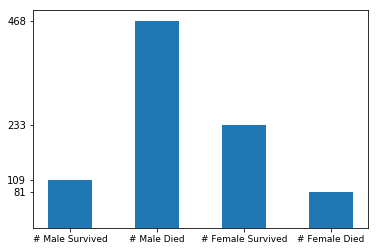

In [200]:
# Definindo as legendas para cada item, além de seu posicionamento no gráfico
passenger_labels = ['# Male Survived', '# Male Died', '# Female Survived', '# Female Died']
passenger_labels_pos = [0,4,8,12]

# Desenhando o gráfico para visualizar os sobreviventes e mortos de cada gênero
plt.bar(passenger_labels_pos, total_passenger_values, width=2)
plt.xticks(passenger_labels_pos, passenger_labels, fontsize=9)
plt.yticks(total_passenger_values)
plt.show()

In [ ]:
'''
A primeira análise faz sentido. Mulheres têm prioridade no salvamento e, por isso, sobreviveram mais ao desastre
- pelo menos no trecho analisado. Foram 34% de sobreviventes mulheres e 17% de sobreviventes homens no conjunto
de dados fornecido.

Agora precisamos saber se a idade também influenciou no índice de resgate.
'''